# Classification model to predict 10-year risk of future coronary heart disease (CHD)

### About the dataset:

It is from an ongoing cardiovascular study of Framingham, Massachusetts residents. The purpose of the classification is to predict whether the patient has a 10-year risk of potential coronary heart disease ( CHD). Information from the patients is given in the dataset. Over 4,240 records and 15 attributes are included.


### Objective: To build a classification model that predicts heart disease in a subject. (note the target column to predict is 'TenYearCHD' where CHD = Coronary heart disease) 

### We are going to perform the following steps: 

1. Read the file and display columns.
2. Handle missing values, Outliers and Duplicate Data
3. Calculate basic statistics of the data (count, mean, std, etc) and exploratory analysts and describe your observations.
4. Select columns that will be probably important to predict heart disease.
5. If you remove columns explain why you removed those.
6. Create training and testing sets (use 60% of the data for the training and reminder for testing).
7. Build a machine learning model to predict TenYearCHD
Evaluate the model (f1 score, Accuracy, Precision ,Recall and Confusion Matrix)
8. Conclude your findings (Model which is giving best f1 score and why)


# Importing Libraries

In [6]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Reading Dataset

In [5]:
data = pd.read_csv(r'E:\Projects\Heart_Decease_Prediction\framingham.csv') # Reading and converting the data into a pandas dataframe
data.shape # Calculating the dimensions of the dataset

(4240, 16)

In [9]:
data.head(10)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


This shows an overview of the Columns, non-null count and the data types of the dataset

### Attributes:

* **sex**: male(0) or female(1);(Nominal)
* **age**: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* **currentSmoker**: whether or not the patient is a current smoker (Nominal)
* **cigsPerDay**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
* **BPMeds**: whether or not the patient was on blood pressure medication (Nominal)
* **prevalentStroke**: whether or not the patient had previously had a stroke (Nominal)
* **prevalentHyp**: whether or not the patient was hypertensive (Nominal)
* **diabetes**: whether or not the patient had diabetes (Nominal)
* **totChol**: total cholesterol level (Continuous)
* **sysBP**: systolic blood pressure (Continuous)
* **diaBP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **heartRate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of a large number of possible values.)
* **glucose**: glucose level (Continuous)
* **10 year risk of coronary heart disease CHD** (binary: “1” means “Yes”, “0” means “No”) - Target Variable


# Data Inspecting and Cleaning 

In [11]:
data.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

It shows the number of np.nan or null values or missing values are present in the dataset:
* education: 105
* cigsPerDay: 29
* BPMeds: 53
* totChol: 50
* BMI: 19
* heartRate: 1
* glucose: 388

In [12]:
data.duplicated().sum()

0

It shows that there are no Duplicated Values present in the dataset.

In [13]:
print((data["glucose"].mode())[0])

75.0


In [14]:
data["glucose"].fillna((data["glucose"].mode())[0], inplace=True)

To minimise the number of missing data in our dataset, fill the missing spaces in the `glucose` column with the data mode (Mode = 75) present.

In [15]:
data.dropna(inplace=True)
data.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Dropping all other rows containing missing values

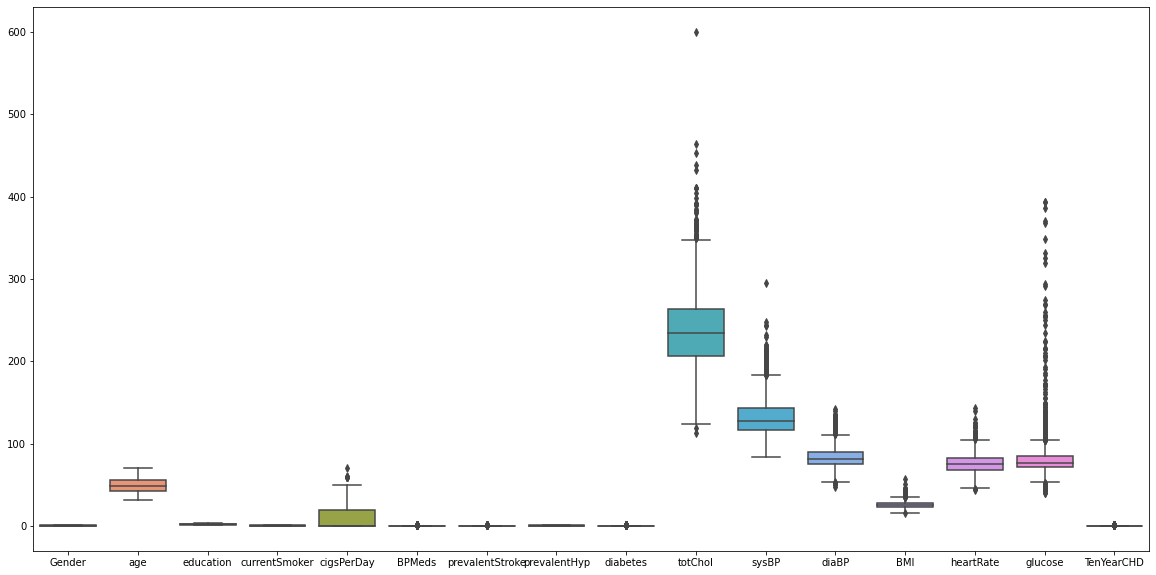

In [16]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

In the `totChol` and `sysBP` columns of our dataset, removable outliers are observed. Outliers are significant in all other numerical columns and can therefore not be eliminated.

In [17]:
data['totChol'].max()

600.0

The Outlier present in `totChol` is 600.

In [18]:
data['sysBP'].max()

295.0

The Outlier present in `sysBP` is 295.

In [19]:
data = data[data['totChol']<600.0]
data = data[data['sysBP']<295.0]
data.shape

(3987, 16)

We are now continuing to introduce EDA with the missing values, outliers and redundant values dealt with.

# Exploratory Data Analysis

In [20]:
data.describe()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000
mean,0.433409,49.469526,1.982694,0.491347,9.027840,0.029345,0.005518,0.309255,0.025082,236.502132,132.177452,82.849887,25.769488,75.869325,81.272385,0.148733
std,0.495608,8.531325,1.020832,0.499988,11.918332,0.168794,0.074087,0.462244,0.156392,43.653337,21.793408,11.854644,4.075145,12.086398,22.954842,0.355870
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,56.800000,143.000000,394.000000,1.000000


The total statistical data is shown.
* It is clear that none of the data in the columns is missing.
* The mean , standard deviation and other statistical parameters of the dataset are also displayed.
* The categorical data of the dataset is also seen since they have already been translated into different numerical values.

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Gender,1.000000,-0.022271,0.012846,0.200413,0.325378,-0.050109,-0.003655,0.008331,0.018317,-0.067404,-0.031767,0.060054,0.080171,-0.115686,0.009070,0.092442
age,-0.022271,1.000000,-0.160758,-0.213310,-0.190319,0.128583,0.045118,0.304031,0.104931,0.271461,0.389472,0.204822,0.133489,-0.008925,0.116007,0.228941
education,0.012846,-0.160758,1.000000,0.018139,0.006329,-0.010156,-0.028592,-0.081164,-0.034995,-0.023309,-0.127374,-0.062408,-0.135678,-0.057808,-0.031328,-0.053684
currentSmoker,0.200413,-0.213310,0.018139,1.000000,0.770796,-0.049012,-0.032574,-0.105110,-0.038933,-0.047181,-0.129719,-0.108840,-0.164294,0.052682,-0.051469,0.023450
cigsPerDay,0.325378,-0.190319,0.006329,0.770796,1.000000,-0.044054,-0.033985,-0.066410,-0.035235,-0.024983,-0.086929,-0.050388,-0.087239,0.068342,-0.050903,0.060126
BPMeds,-0.050109,0.128583,-0.010156,-0.049012,-0.044054,1.000000,0.127479,0.259859,0.048140,0.087307,0.262652,0.196724,0.103322,0.016391,0.054397,0.090205
prevalentStroke,-0.003655,0.045118,-0.028592,-0.032574,-0.033985,0.127479,1.000000,0.067370,0.009705,0.008219,0.055719,0.049504,0.031511,-0.012082,0.016523,0.044988
prevalentHyp,0.008331,0.304031,-0.081164,-0.105110,-0.066410,0.259859,0.067370,1.000000,0.073136,0.163205,0.695979,0.615394,0.303619,0.150751,0.083679,0.174795
diabetes,0.018317,0.104931,-0.034995,-0.038933,-0.035235,0.048140,0.009705,0.073136,1.000000,0.032146,0.100603,0.050340,0.082461,0.051506,0.608596,0.086217
totChol,-0.067404,0.271461,-0.023309,-0.047181,-0.024983,0.087307,0.008219,0.163205,0.032146,1.000000,0.214626,0.171085,0.122846,0.088668,0.044419,0.078166


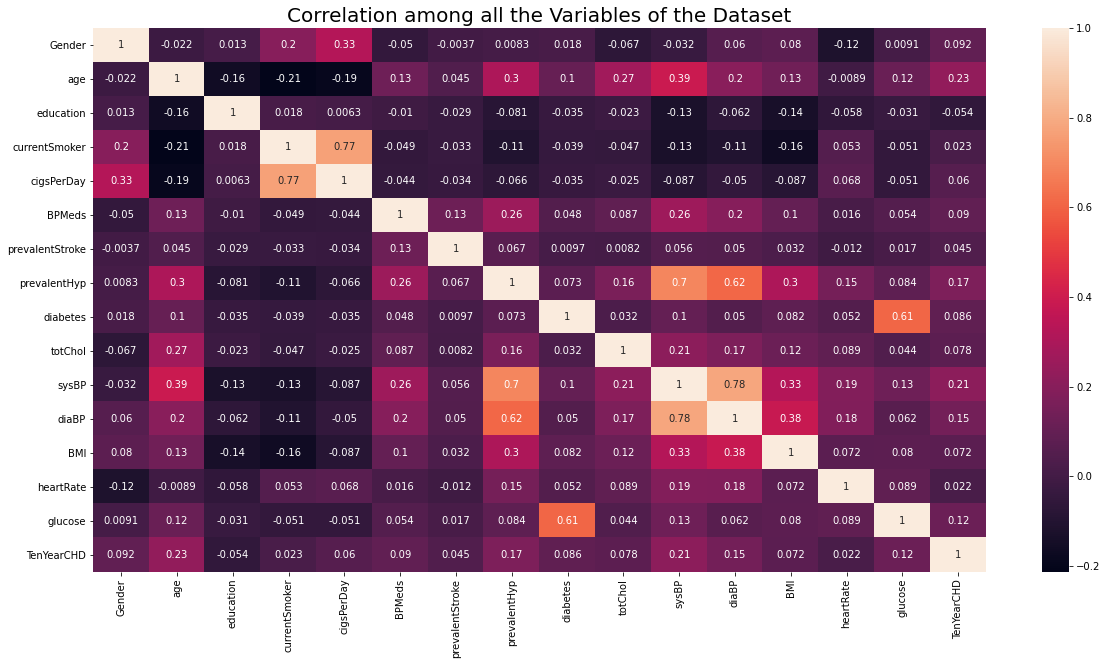

In [21]:
#Checking relationship between variables
cor=data.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

Compared to all the independent data, the correlation coefficient between education and and target variable TenYearCHD is very low and actually negative.

### 1. Univariate Analysis

#### Categorical Features

In [22]:
categorical_features = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [23]:
for feature in categorical_features:
    print(feature,':')
    print(data[feature].value_counts())
    print("-----------------")

male :


KeyError: 'male'

ValueError: Could not interpret input 'male'

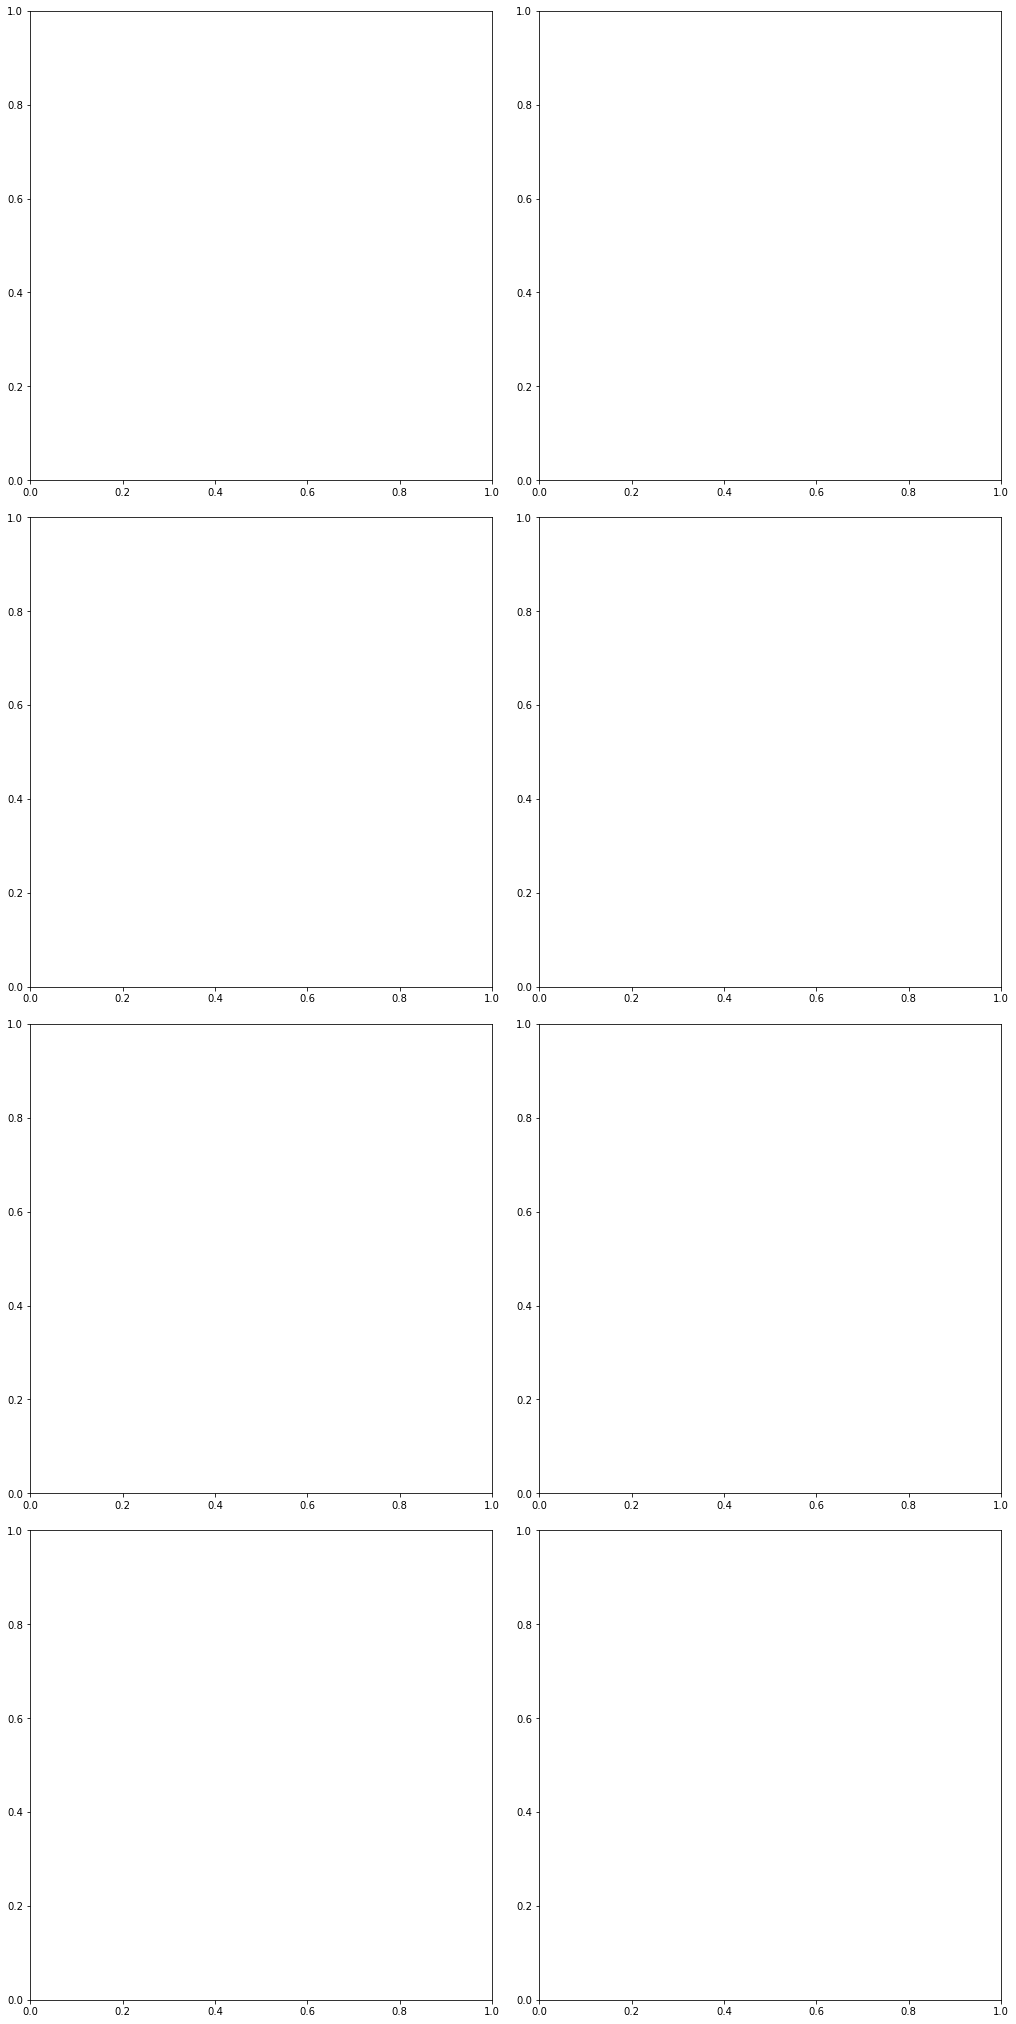

In [24]:
num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=data, ax=axs[row][pos])

Among the categorical characteristics:
* Highly imbalanced are `BPmeds`, `prevalentStroke` and `diabetes`.
* There are four `education` stages, while the other categorical features are all binary.

* The number of smokers and non-smokers is almost the same in `currentSmoker`

#### Numerical Features

In [ ]:
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(data[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

Among the numerical features:
* `totChol`, `sysBP`, `diaBP`and `BMI` has an uniform distribution and the rest are unevenly distributed
* `cigsPerDay` has a highly uneven distribution with the most data present in 0 
* `cigsPerDay` and `sysBP` shows quite a bit and slight right skewness respectively.

In [25]:
num_plots = len(numeric_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
color = ['m', 'g', 'b', 'r', 'y', 'v', 'o']
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(numeric_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.violinplot(y=var, data=data, ax=axs[row][pos], linewidth=2)

NameError: name 'numeric_features' is not defined

For the same numerical features:
* `cigsPerDay` has uneven distribution although most of the data is concentrated on `0`
* The majority portions of the following columns lie in the range: 
    * `totChol`: 150 to 300
    * `sysBP`: 100 to 150
    * `diaBP`: 60 to 100
    * `BMI`: 20 to 30
    * `heartRate`: 50 to 100
    * `glucose`: 50 to 150

#### Target Variable

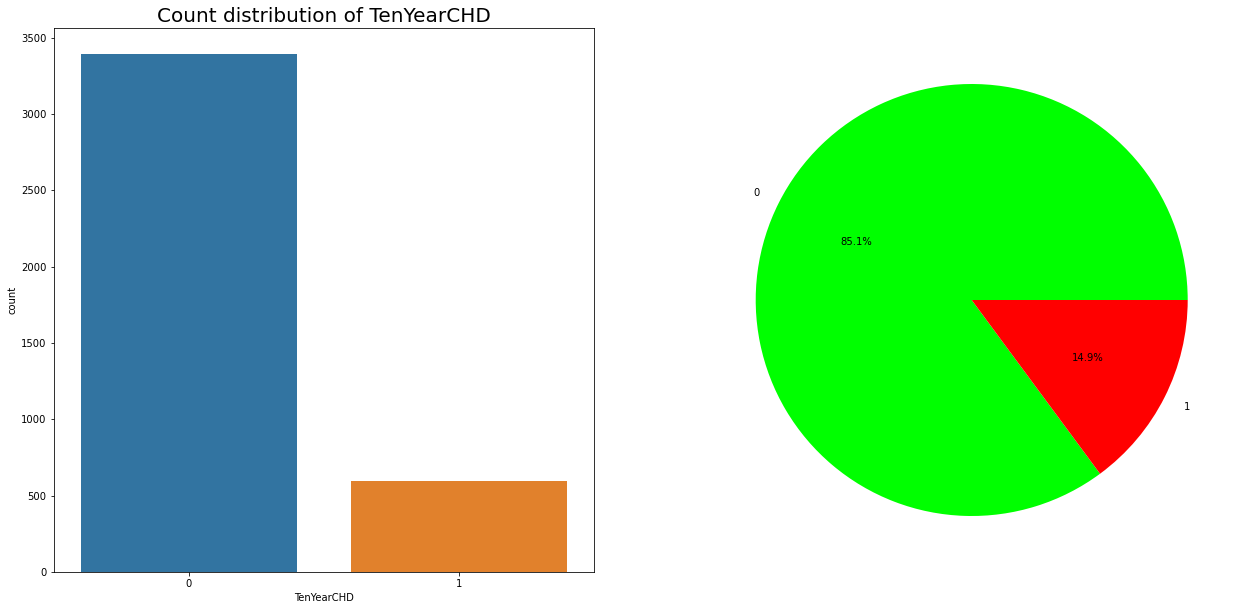

In [26]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=data)
plt.title("Count distribution of TenYearCHD", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(data["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["lime","red"])
plt.show()

The spread is strongly imbalanced. As in the case above, the number of negative cases is greater than the number of positive cases. This will lead to an issue of class imbalance when fitting our models. It is therefore important to resolve and take care of this issue.

### 2. Bivariate Analysis

#### Relationship between education and cigsPerDay

In [27]:
#Grouping education and cigsPerDay

graph_1 = data.groupby("education", as_index=False).cigsPerDay.mean()

(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <a list of 10 Text major ticklabel objects>)

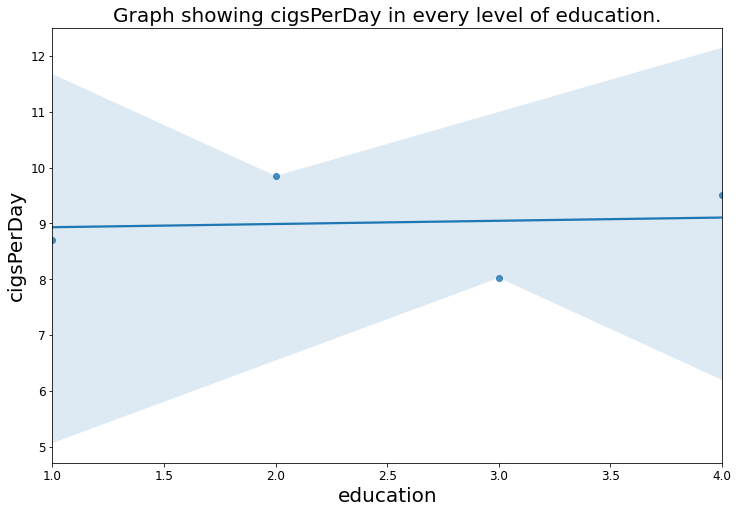

In [28]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_1["education"], y=graph_1["cigsPerDay"])
plt.title("Graph showing cigsPerDay in every level of education.", size=20)
plt.xlabel("education", size=20)
plt.ylabel("cigsPerDay", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* There is no linear relationship observed.
* Level 3 `education` shows the lowest mean.

#### Which gender has more risk of coronary heart disease CHD

In [29]:
#checking for which gender has more risk of coronary heart disease CHD

graph_2 = data.groupby("male", as_index=False).TenYearCHD.sum()

KeyError: 'male'

In [30]:
#Ploting the above values

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_2["male"], y=graph_2["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=20)
plt.xlabel("Gender\n0 is female and 1 is male",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

NameError: name 'graph_2' is not defined

<Figure size 864x576 with 0 Axes>

`Males` had a significantly higher risk of coronary heart disease,` TenYearCHD,` according to this dataset.

#### Which age group has more smokers.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text major ticklabel objects>)

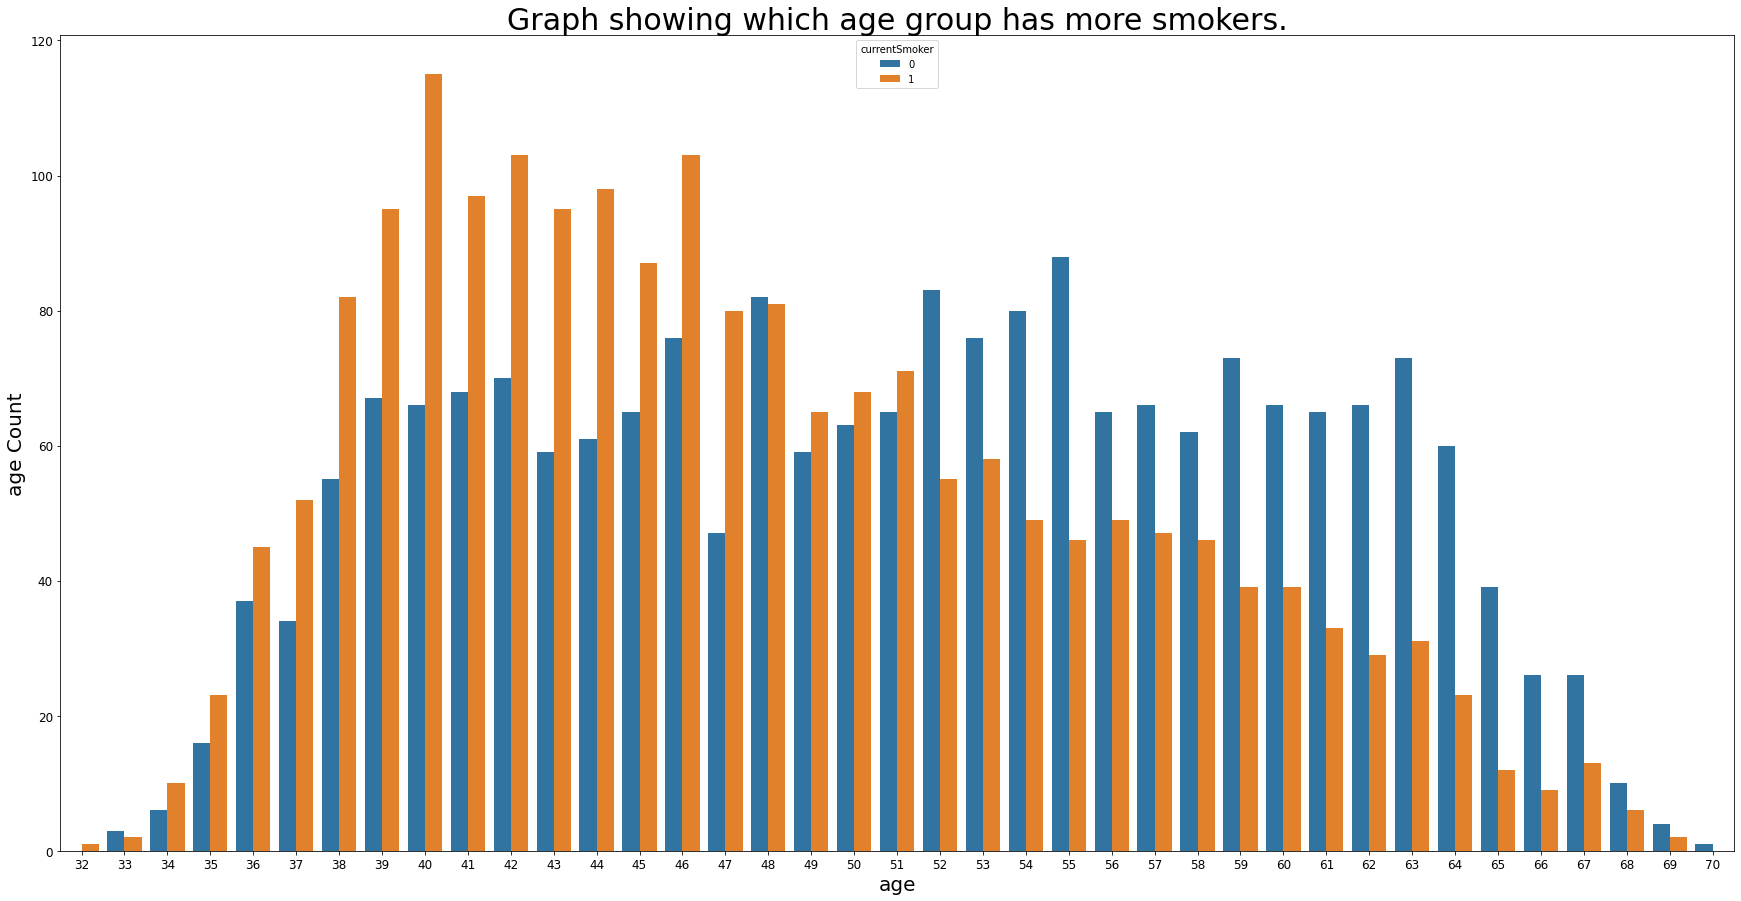

In [31]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=data,hue="currentSmoker")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* Mid-age groups between the ages of 38 and 46 have a higher number of `currentSmokers`
* No `currentSmokers` found below 32 `age`
* The median age is 70 for a `currentSmokers`

#### Relation between cigsPerDay and risk of coronary heart disease.

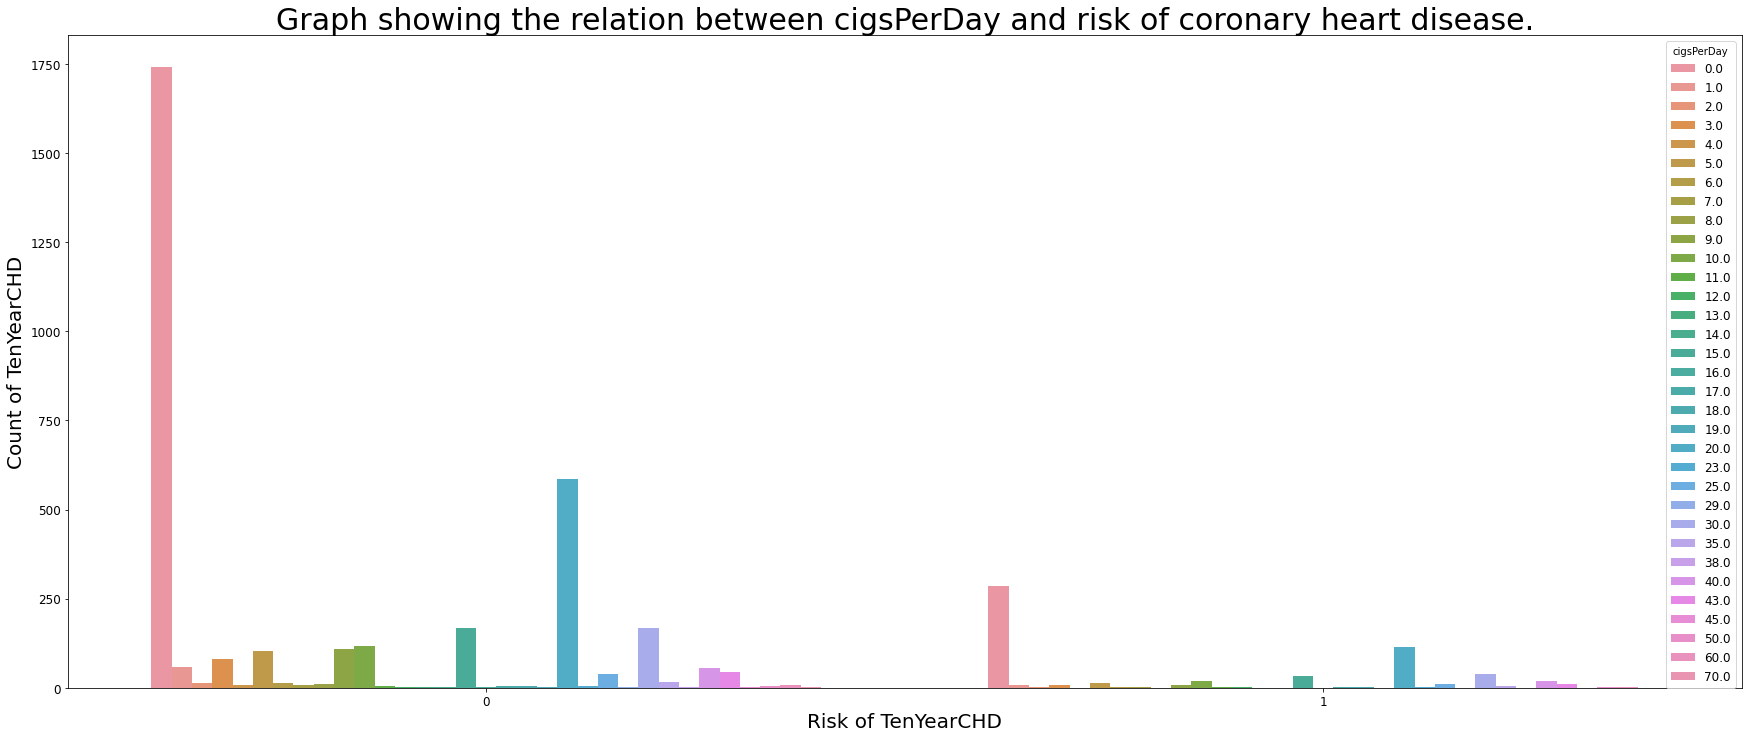

In [32]:
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=data,hue="cigsPerDay")
plt.legend(title='cigsPerDay', fontsize='large')
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

* Low `cigsPerDay` is associated with lower CHD risk.
* Those that do not smoke, i.e., have a very low chance of catching the disease with a `cigsPerDay` of 0.0
* Low`cigsPerDay `does not necessarily guarantee a much lower risk of CHD, but that is the case.

#### Relation between sysBP and risk of CHD.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

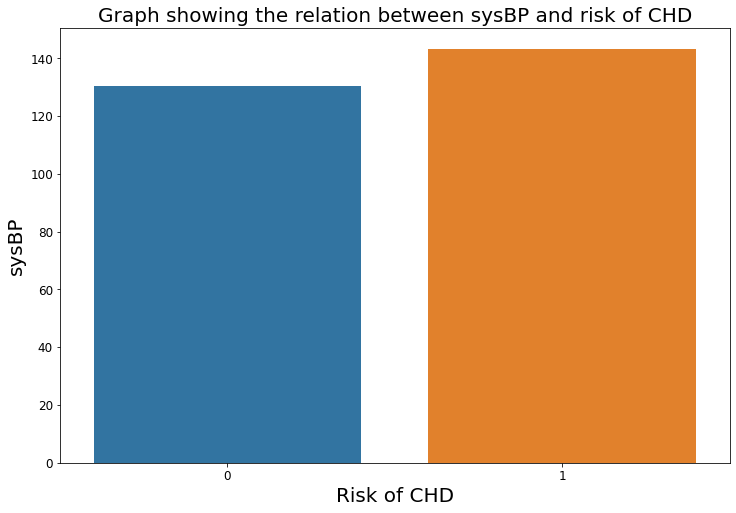

In [33]:
# Grouping up the data and ploting it

graph_3 = data.groupby("TenYearCHD", as_index=False).sysBP.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_3["TenYearCHD"], y=graph_3["sysBP"])
plt.title("Graph showing the relation between sysBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("sysBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

(array([ 60.,  70.,  80.,  90., 100., 110., 120., 130., 140., 150.]),
 <a list of 10 Text major ticklabel objects>)

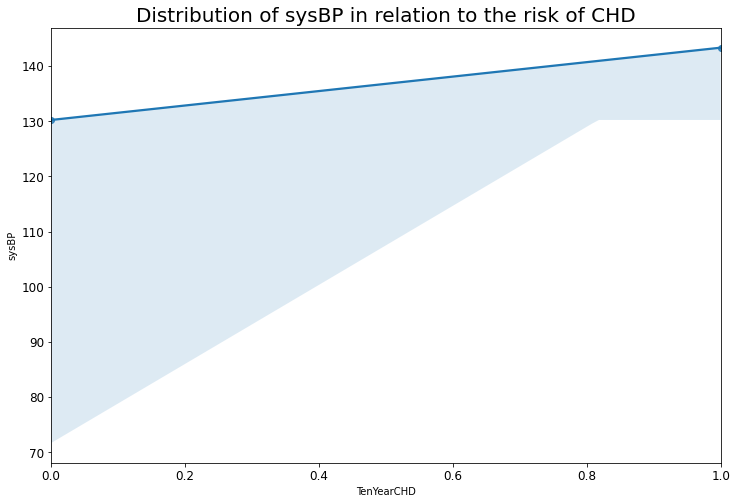

In [34]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_3["TenYearCHD"], y=graph_3["sysBP"])
plt.title("Distribution of sysBP in relation to the risk of CHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* Slight higher risk association of `TenYearCHD` found with higher`sysBP`
* Most individuals with `sysBP` ranging from 72 to 130 are less likely to develop the disease.

#### Relation between diaBP and risk of CHD

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

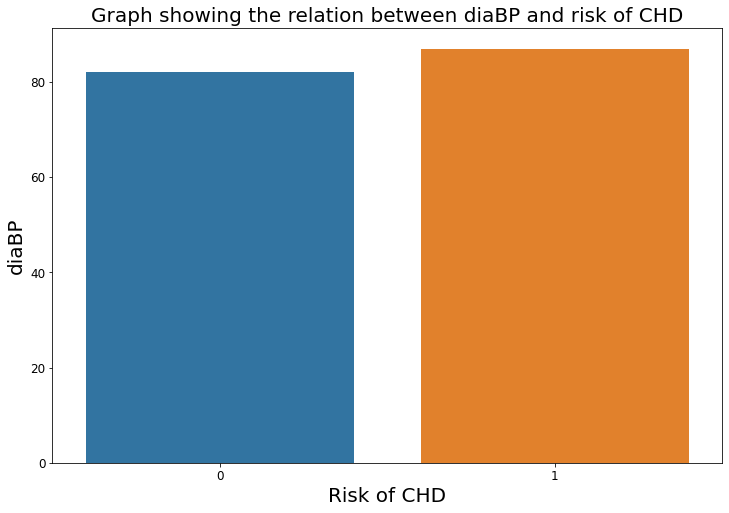

In [35]:
# Grouping up the data and ploting it

graph_4 = data.groupby("TenYearCHD", as_index=False).diaBP.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_4["TenYearCHD"], y=graph_4["diaBP"])
plt.title("Graph showing the relation between diaBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("diaBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

(array([40., 50., 60., 70., 80., 90.]),
 <a list of 6 Text major ticklabel objects>)

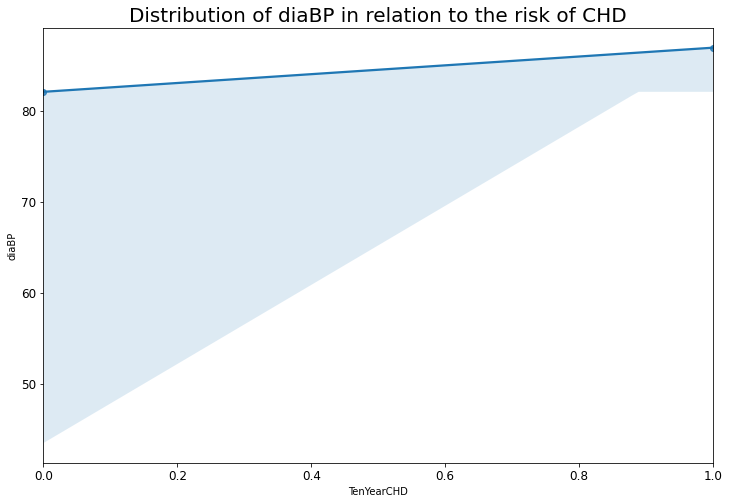

In [36]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_4["TenYearCHD"], y=graph_4["diaBP"])
plt.title("Distribution of diaBP in relation to the risk of CHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* Slight association between greater chance of `TenYearCHD` and greater `diaBP` comparable to the previous one
* Most individuals with `diaBP` up to 80.0 have a lower risk of developing the disease.

#### Relation between age and totChol

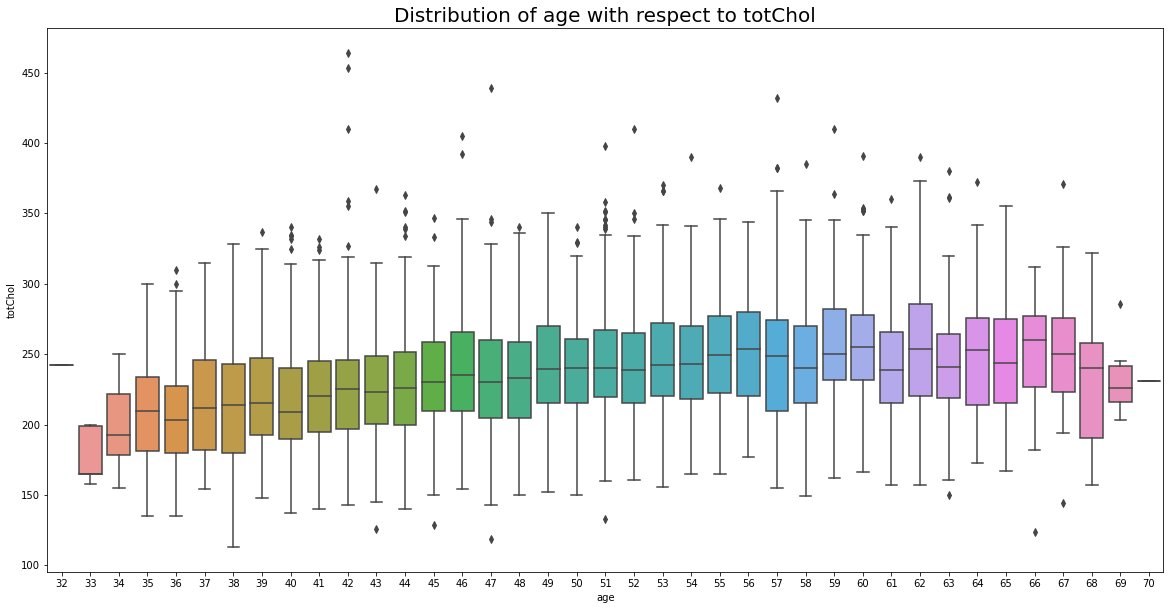

In [37]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(x="age",y="totChol",data=data)
plt.title("Distribution of age with respect to totChol", size=20)
plt.show()

The boxplots are shifted in an upwardly manner suggesting that aged people have more cholesterol (bad cholesterol in general)

### 3. Multivariate Analysis

#### Relationship between age and cigsPerDay, totChol, glucose.

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

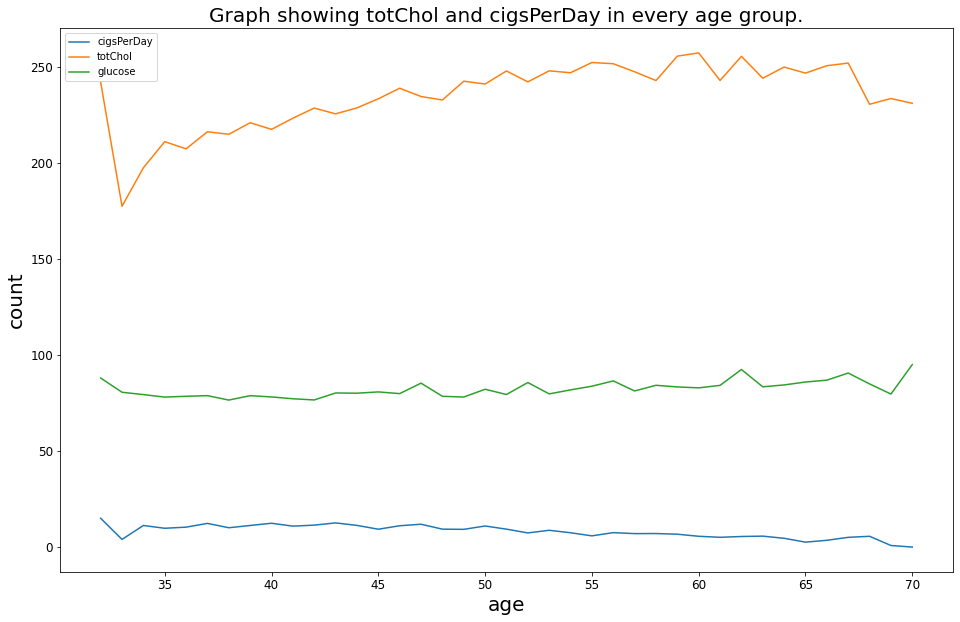

In [38]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

graph_5 = data.groupby("age").cigsPerDay.mean()
graph_6 = data.groupby("age").totChol.mean()
graph_7 = data.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=graph_5, label="cigsPerDay")
sns.lineplot(data=graph_6, label="totChol")
sns.lineplot(data=graph_7, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* There is a minor relation between `totChol` and `glucose`.
* `totChol` has a steep, linear and inverse graph for lower ranges of `age`
* `cigsPerDay` has a fairly parallel relationship with `age`

#### Distribution of sysBP vs diaBP with respect to currentSmoker and male attributes

In [39]:
#sysBP vs diaBP with respect to currentSmoker and male attributes
#plt.figure(figsize=(18, 9), facecolor='w')
sns.lmplot('sysBP', 'diaBP', 
           data=data,
           hue="TenYearCHD",
           col="male",row="currentSmoker")
plt.show()

KeyError: "['male'] not in index"

The above graph plots the relationship between systolic blood pressure and diastolic blood pressure for patients based on their gender and whether they are current smokers or not and plots the best fit line

# Resampling imbalanced dataset by oversampling positive cases

In [40]:
target1=data[data['TenYearCHD']==1]
target0=data[data['TenYearCHD']==0]

In [41]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

In [42]:
target=pd.concat([target0,target1])

In [43]:
target['TenYearCHD'].value_counts()

1    3394
0    3394
Name: TenYearCHD, dtype: int64

In [44]:
data=target
np.shape(data)

(6788, 16)

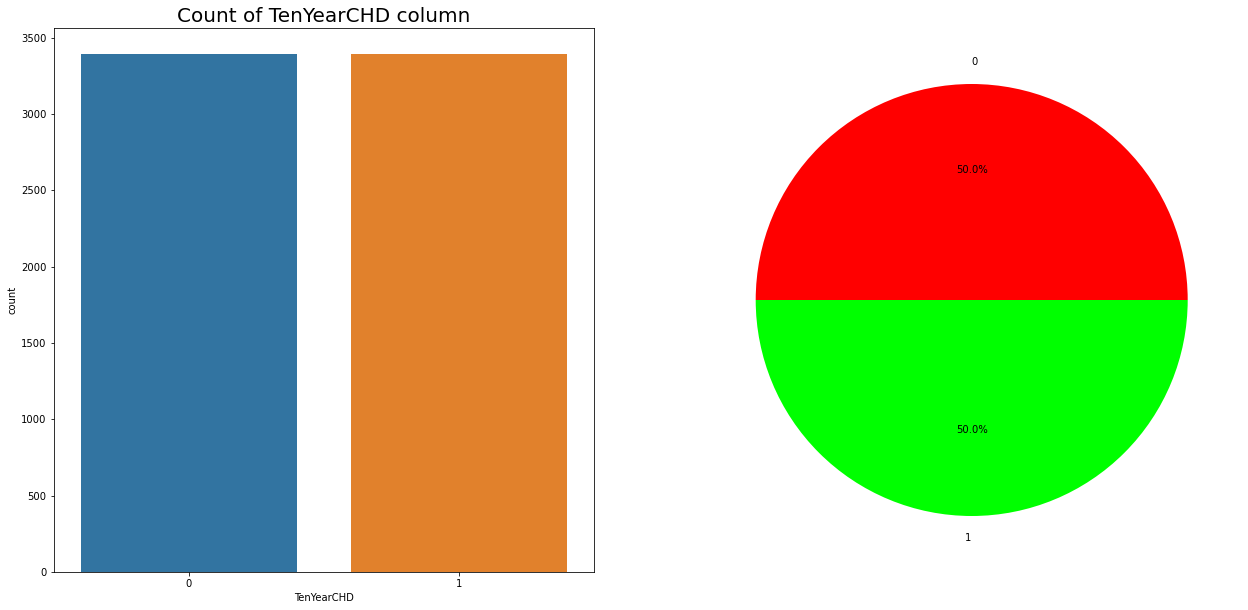

In [45]:
#Distribution of heart disease cases in the balanced dataset, the outcome variable
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=data)
plt.title("Count of TenYearCHD column", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(data["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["red","lime"])
plt.show()

The number of positive and negative cases are equal. Hence the classes are now balanced for model fitting

# Feature Selection


In [46]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
X=data.iloc[:,0:15]
y=data.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (6788, 15) 
y -  (6788,)


In [47]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)

In [48]:
fit=best.fit(X,y)

In [49]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [50]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

         Feature        Score
10         sysBP  2121.922128
14       glucose  1232.342416
1            age  1006.482991
4     cigsPerDay   788.788750
9        totChol   769.066248
11         diaBP   486.662514
7   prevalentHyp   221.104823
0         Gender    66.775610
5         BPMeds    66.216216
8       diabetes    54.258065
12           BMI    44.717502


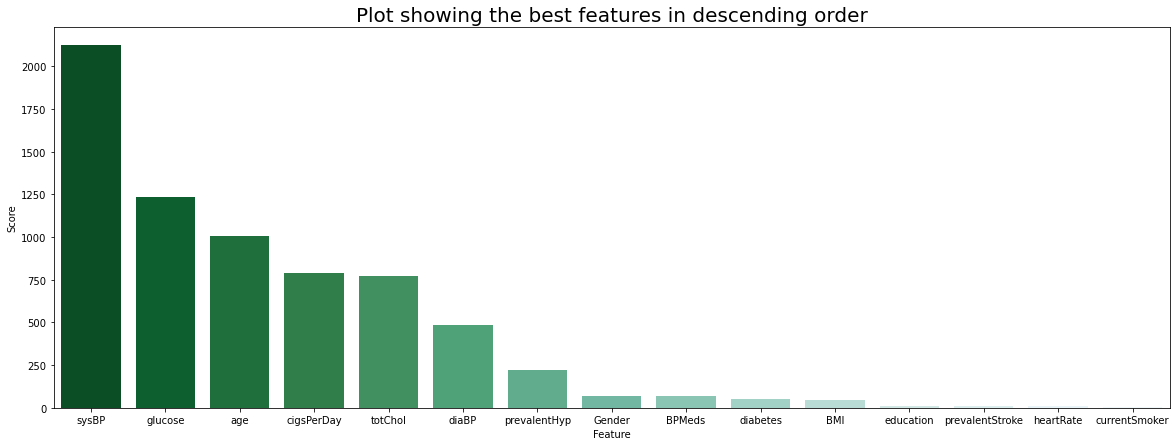

In [51]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

This graph displays the `characteristics` and their respective `chi-square test` ratings

In [55]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

['sysBP',
 'glucose',
 'age',
 'cigsPerDay',
 'totChol',
 'diaBP',
 'prevalentHyp',
 'Gender',
 'BPMeds',
 'diabetes']

Only these features have strongest influence over the target variable. They are, in particular order:
* sysBP
* glucose
* age
* cigsPerDay
* totChol
* diaBP
* prevalentHyp
* male
* BPMeds
* diabetes


In [56]:
data=data[['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','male','BPMeds','diabetes','TenYearCHD']]
data.head()

KeyError: "['male'] not in index"

# Feature Splitting and Scaling

In [57]:
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

We divide the dataset into training and test sub-datasets for predictive modeling

In [58]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Predictive Modeling

We use the following different machine learning models for the dataset:

1. Logistic Regressor
2. K-Nearest Neighbour Classifier
3. Random Forest Classifier
4. Decision Tree Classifier
5. Gradient Boosting Classifier

In [59]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confussion matrix
[[882 470]
 [419 945]]


Accuracy of Logistic Regression: 67.26804123711341 

              precision    recall  f1-score   support

           0       0.68      0.65      0.66      1352
           1       0.67      0.69      0.68      1364

    accuracy                           0.67      2716
   macro avg       0.67      0.67      0.67      2716
weighted avg       0.67      0.67      0.67      2716



In [60]:
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
knn_acc_score = accuracy_score(test_y, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(test_y, knn_predict))

confussion matrix
[[1098  254]
 [  27 1337]]


Accuracy of k-NN Classification: 89.65390279823269 

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1352
           1       0.84      0.98      0.90      1364

    accuracy                           0.90      2716
   macro avg       0.91      0.90      0.90      2716
weighted avg       0.91      0.90      0.90      2716



In [61]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confussion matrix
[[1137  215]
 [  54 1310]]


Accuracy of Random Forest: 90.09572901325478 

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1352
           1       0.86      0.96      0.91      1364

    accuracy                           0.90      2716
   macro avg       0.91      0.90      0.90      2716
weighted avg       0.91      0.90      0.90      2716



In [62]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))

confussion matrix
[[1062  290]
 [  26 1338]]


Accuracy of DecisionTreeClassifier: 88.36524300441826 

              precision    recall  f1-score   support

           0       0.98      0.79      0.87      1352
           1       0.82      0.98      0.89      1364

    accuracy                           0.88      2716
   macro avg       0.90      0.88      0.88      2716
weighted avg       0.90      0.88      0.88      2716



In [63]:
m5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(train_x,train_y)
gvc_predicted = gvc.predict(test_x)
gvc_conf_matrix = confusion_matrix(test_y, gvc_predicted)
gvc_acc_score = accuracy_score(test_y, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y,gvc_predicted))

confussion matrix
[[ 933  419]
 [ 311 1053]]


Accuracy of Gradient Boosting Classifier: 73.1222385861561 

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1352
           1       0.72      0.77      0.74      1364

    accuracy                           0.73      2716
   macro avg       0.73      0.73      0.73      2716
weighted avg       0.73      0.73      0.73      2716



## Hyperparameter Tuning for best Classifier
#### Using Randomized Search Cross Validation

### Random Forest Classifier

In [64]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [65]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=7, verbose=2)

In [ ]:
rf_hyper = rf_random.best_estimator_
rf_hyper.fit(train_x,train_y)
print("Accuracy on training set is : {}".format(rf_hyper.score(train_x,train_y)))
print("Accuracy on validation set is : {}".format(rf_hyper.score(test_x, test_y)))
rf_predicted = rf_hyper.predict(test_x)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("Accuracy of Hyper-tuned Random Forest Classifier:",rf_acc_score*100,'\n')
print(classification_report(test_y, rf_predicted))

### Gradient Boosting Classifier

In [ ]:
#Number of trees
n_estimators = [int(i) for i in np.linspace(start=100,stop=1000,num=10)]
#Number of features to consider at every split
max_features = ['auto','sqrt']
#Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(10, 100, num=10)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split=[2,5,10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
gb=GradientBoostingClassifier(random_state=0)
#Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=random_grid,
                              n_iter=100, scoring='f1', 
                              cv=3, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
gb_random.fit(train_x,train_y)

In [ ]:
gb_hyper = gb_random.best_estimator_
gb_hyper.fit(train_x,train_y)
print("Accuracy on training set is : {}".format(gb_hyper.score(train_x,train_y)))
print("Accuracy on validation set is : {}".format(gb_hyper.score(test_x, test_y)))
gbc_predicted = gb_hyper.predict(test_x)
gbc_acc_score = accuracy_score(test_y, gbc_predicted)
print("Accuracy of Hyper-tuned Gradient Boosting Classifier:",gbc_acc_score*100,'\n')
print(classification_report(test_y, gbc_predicted))

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(test_y,lr_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(test_y,knn_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(test_y,rf_predicted)                                                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(test_y,dt_predicted)
gbc_false_positive_rate,gbc_true_positive_rate,gbc_threshold = roc_curve(test_y,gbc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(15,8), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(gbc_false_positive_rate,gbc_true_positive_rate,label='Gradient Boosting Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# **Model Evaluation**

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Random Forest',
                                   'Decision Tree','Gradient Boosting'], 'Accuracy': [lr_acc_score*100, knn_acc_score*100, 
                                                                                      rf_acc_score*100, dt_acc_score*100,gbc_acc_score*100]})
model_ev

In [ ]:
colors = ['red','green','blue','gold','silver']
plt.figure(figsize=(15,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# Ensembling

In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.

In [ ]:
scv=StackingCVClassifier(classifiers=[rf_hyper, gbc_hyper, knn], meta_classifier= rf)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)
scv.fit(train_x.values,train_y.values)
scv_predicted = scv.predict(test_x)
scv_conf_matrix = confusion_matrix(test_y, scv_predicted)
scv_acc_score = accuracy_score(test_y, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(test_y,scv_predicted))